## Logistic Regression 

In [1]:
using DataFrames
using Gadfly
using Colors
using JuMP
using Optim

INFO: Recompiling stale cache file /Users/asharma19/.julia/lib/v0.6/DataFrames.ji for module DataFrames.
INFO: Recompiling stale cache file /Users/asharma19/.julia/lib/v0.6/Gadfly.ji for module Gadfly.
INFO: Recompiling stale cache file /Users/asharma19/.julia/lib/v0.6/JuMP.ji for module JuMP.


### Reading and plotting data for visualization

In [2]:
## Here your task is to build a classification model that estimates an applicant’s 
## probability of admission based the scores from those two exams.

exam = readtable("ex2data1.txt")
newname = ["Score_1", "Score_2","Result"];
names!(exam.colindex, map(parse, newname));

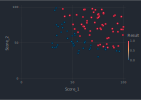

In [3]:
#Seperating features and labels
X = exam[:,[1;2]]
Y = exam[3]

# Plotting the data to visualize the difference in labels
Gadfly.push_theme(:dark)
plot(exam,x="Score_1",y="Score_2",color="Result",Geom.point)

In [14]:
# Hypothesis function

sigmoid(x) = 1.0 ./ (1.0 + exp.(-x))

sigmoid (generic function with 1 method)

In [2]:
# Function to return and Cost (Closures and Curry)

function cost_gradient(θ, X, y)
    m = length(y)
    return (θ::Array) -> begin 
        h = sigmoid(X * θ)   
        J = (1 / m) * sum(-y .* log.(h) .- (1 - y) .* log.(1 - h))         
        end, (storage::Array,θ::Array) -> begin  
        h = sigmoid(X * θ) 
        storage[:] = (1 / m) * (X' * (h .- y))        
    end
end

cost_gradient (generic function with 1 method)

In [7]:
# Adding intercept feature column
m,n = size(X)
X = Array(X)
Y = Array(Y)
z = ones(m,1)
X = hcat(z,X)
theta = zeros(n+1,1)

3×1 Array{Float64,2}:
 0.0
 0.0
 0.0

In [23]:
# Optimizing the cost function using Optim Gradient Descent
cost, gradient! = cost_gradient(theta, X, Y)
res = optimize(cost, gradient!, theta, method = ConjugateGradient(), iterations = 400);


In [24]:
# Optimum theta
θ = Optim.minimizer(res)

3×1 Array{Float64,2}:
 -24.8699  
   0.203382
   0.199882

In [25]:
# Part 4 prediction (student with score1 = 45 and score2 = 85)
# Predicted admission percentage
predicted_per = sigmoid([1 45 85]*θ)

1×1 Array{Float64,2}:
 0.78112

In [26]:
# Accuracy on Training set
p = sigmoid(X*θ) .>= 0.5;

In [27]:
# Percentage of correct labels
sum(p .== Y) / length(Y)

0.8888888888888888

## Logistic Regression (Regularized)

In [35]:
#Reading the data
data = readtable("ex2data2.txt")
new_names = ["test1", "test2","result"]
names!(data.colindex, map(parse, new_names));

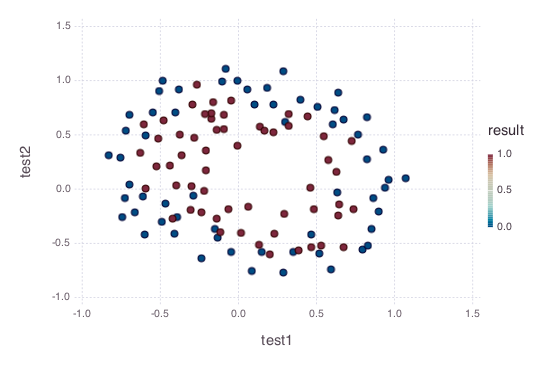

In [36]:
#Visualizing the data
plot(data,x="test1",y="test2",color="result",Geom.point)

In [37]:
# Segregating features and labels
X = data[:,[1;2]]
Y = data[3]
X = Array(X)
Y = Array(Y)
lambda = 1.5

1.5

In [38]:
function map_features(X1,X2)
    degree = 6
    out = ones(size(X1[:,1]))
    for i=1:6
        for j=0:i
            out = hcat(out,(X1.^(i-j)).*(X2.^j)) 
        end
    end
    return out
end
        

map_features (generic function with 1 method)

In [39]:
# function cost_gradient_reg(theta, X ,y, lambda)
#     m = length(X)
#     return (theta::Array) -> begin
#         h = sigmoid(X*theta)
#         J = (1/m) * sum(-y .* log.(h) .- (1 - y) .* log.(1 - h)) + (lambda/2*m) * sum(theta[2:end] .^ 2)
#         end, (storage::Array, theta::Array ) -> begin
#         h = sigmoid(X*theta)
#         storage[:] = (1/m)* (X' * (h .- y)) + (lambda/m) * [0;theta[2:end]]
#     end
# end
function cost_gradient_reg(θ, X, y, λ)
    m = length(y)
    return (θ::Array) -> begin 
        h = sigmoid(X * θ)   
        J = (1 / m) * sum(-y .* log.(h) .- (1 - y) .* log.(1 - h)) + λ / (2 * m) * sum(θ[2:end] .^ 2)         
        end, ( storage::Array,θ::Array) -> begin  
        h = sigmoid(X * θ) 
        storage[:] = (1 / m) * (X' * (h .- y)) + (λ / m) * [0; θ[2:end]]        
    end
end

cost_gradient_reg (generic function with 1 method)

In [40]:
# X1 = X[:,1]
# X2 = X[:,2]
# X = map_features(X1,X2);
# m,n = size(X)
# theta = zeros(n,1);
m,n = size(X)
X = Array(X)
Y = Array(Y)
z = ones(m,1)
X = hcat(z,X)
theta = zeros(n+1,1)

3×1 Array{Float64,2}:
 0.0
 0.0
 0.0

In [41]:
size(X),size(Y)

((117, 3), (117,))

In [42]:
cost, gradient! = cost_gradient_reg(theta, X, Y, lambda)
res = optimize(cost, gradient!, theta, method = ConjugateGradient(), iterations = 400)

Results of Optimization Algorithm
 * Algorithm: Conjugate Gradient
 * Starting Point: [0.0,0.0,0.0]
 * Minimizer: [-0.030822031508906198,-0.25316448914251927, ...]
 * Minimum: 6.904688e-01
 * Iterations: 7
 * Convergence: true
   * |x - x'| ≤ 1.0e-32: false 
     |x - x'| = 5.49e-08 
   * |f(x) - f(x')| ≤ 1.0e-32 |f(x)|: false
     |f(x) - f(x')| = 9.65e-16 |f(x)|
   * |g(x)| ≤ 1.0e-08: true 
     |g(x)| = 8.60e-10 
   * Stopped by an increasing objective: false
   * Reached Maximum Number of Iterations: false
 * Objective Calls: 16
 * Gradient Calls: 9

In [43]:
θ = Optim.minimizer(res)

3×1 Array{Float64,2}:
 -0.030822 
 -0.253164 
 -0.0381432

In [46]:
p = sigmoid(X*θ) .>= 0.5;
sum(p .== Y) / length(Y)

0.47863247863247865